# Chapter 7 Investigation of Cross-Frequency Coupling in a Local Field Potential

## Step 1 Visual inspection

### Load the data

In [1]:
load('Ch7-LFP-1.mat')

### Plot LFP

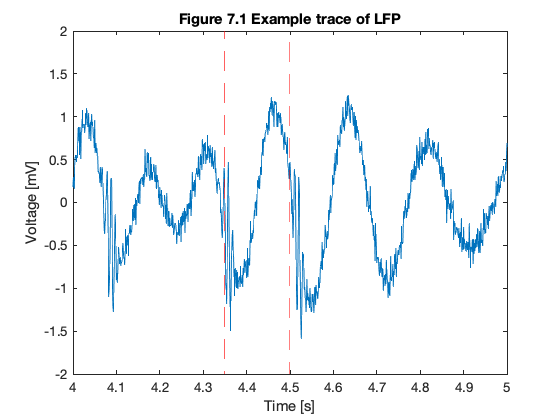

In [2]:
figure
plot(t, LFP)
axis([4 5 -2 2])
hold on
plot(ones(2, 1) * [4.35, 4.5], ylim' * ones(1, 2), 'r--')
xlabel('Time [s]')
ylabel('Voltage [mV]')
title('Figure 7.1 Example trace of LFP')


## Step 2 Estimate power spectrum

### 2.1 Using classic FFT

In [6]:
dt=t(2)-t(1);
T=t(end);
N=length(LFP);

#### estimate FFT using Hanning window

In [7]:
x = hann(N) .* transpose(LFP);
xf = fft(x - mean(x)); % zero-mean process
Sxx = 2 * dt^2 / T * (xf .* conj(xf));
Sxx = Sxx(1:N / 2 + 1);


#### plot the power spectrum

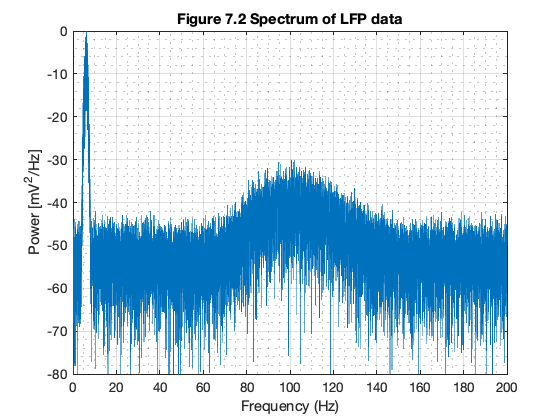

In [10]:
df = 1 / max(T);
fNQ = 1 / dt / 2;
faxis = (0:df:fNQ);
plot(faxis, 10 * log10(Sxx))
xlim([0 200])
ylim([-80 0])
grid on
grid minor
xlabel('Frequency (Hz)')
ylabel('Power [mV^2/Hz]')
title('Figure 7.2 Spectrum of LFP data')


### 2.2 Using multitaper method to estimate spectrum